# **EDA with python and applying Logistic Regression**

for this lecture we will be working with the Titanic data set from kaggle https://www.kaggle.com/datasets/yasserh/titanic-dataset

This is very famous data set and very often is a student's first step in machine learning! 

we will be trying to predict a classification survival or deceasesd . lets begin our understanding of implementating logistic regression in python for classification .

we will use a "semi-cleaned" version of the titanic data set . if you use the data sety hosted directly on kaggle . you may need to do some adddtional cleaning not shown in this lecture notebooks 

although i did use the direct one .

# Import Libraries 

lets import some libraries to get started . 

In [35]:
import pandas as pd 
# this library we are using for data manipulation and analysis 
import numpy as np 
# for numerical computation
import matplotlib.pyplot as plt 
# this is for plotting the graph
import seaborn as sns 
# this is also for plotting graphs as well as for statistical concepts .
%matplotlib inline
# this is for showing plots inside the notebook . 

# **The Data**

lets start by reading in the titanic_train.csv file into a pandas dataframe 

In [36]:
train = pd.read_csv("C:/Users/Lenovo/Data-Science-Learning-Journey/Python_for_DS/Datasets/Titanic-Dataset.csv")

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Exploratory Data Analysis**

let's begin some exploratory data analysis we will start by checking out missing data!

# **Missing Data**

we can use seaborn to create a simple heatmap to see where we are missing data!

In [38]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


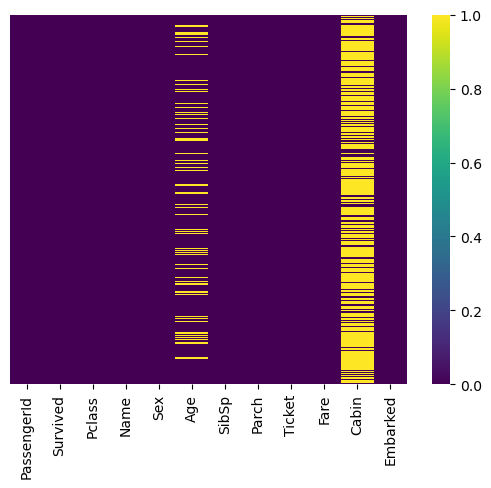

In [41]:
# we are gong to use heatmap , heatmap we can actually use to visualize our data in a different color 
sns.heatmap(train.isnull() , yticklabels=False , cbar=False ,  cmap='viridis')
plt.show()

Roughly 20 percent of the age data is missing . tHE Proportion of age missing is likeyly small enough for resonate replacement with some form of imputation looking at the cabin column. it looks like we  are just missing too much of that data to do something usefull with at a base level we will probably drop this later,or change it to another feature like "Cabin known : 1 or 0 "

for more more play with the plots by defining a small dataset by yourself . 

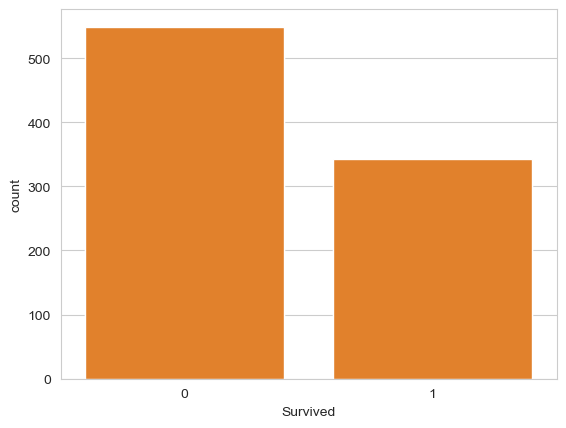

In [44]:
sns.set_style('whitegrid')
sns.countplot(x='Survived' , data=train)
plt.show()

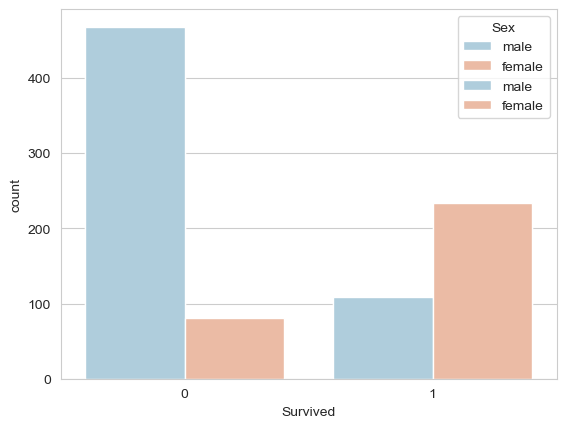

In [46]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')  
# the hue parameter adds color based grouping to our plots.
plt.show()


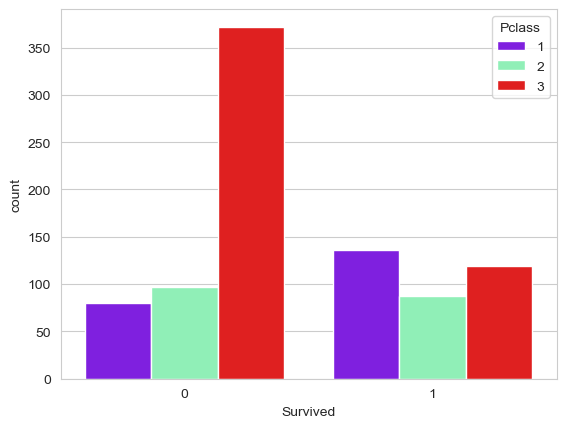

In [49]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
plt.show()

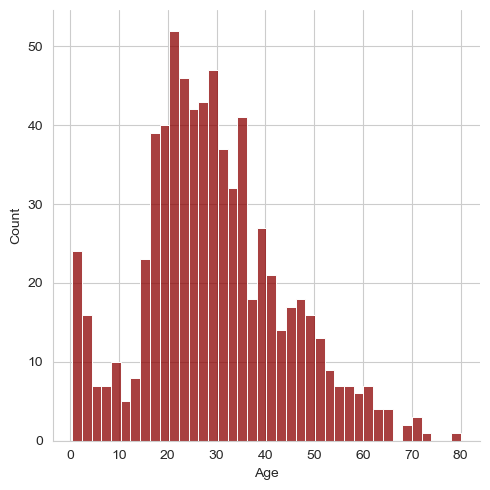

In [52]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=40)
plt.show()

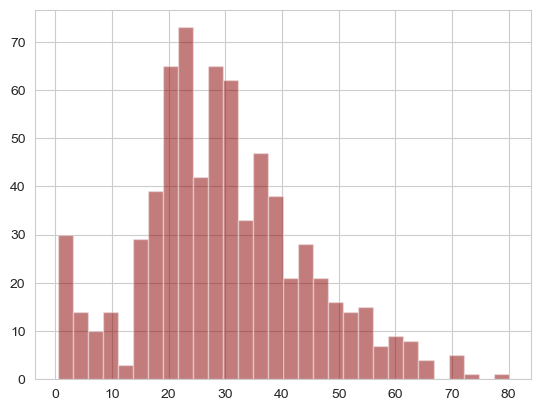

In [54]:
train['Age'].hist(bins=30 , color='darkred',alpha=0.3)
plt.show()

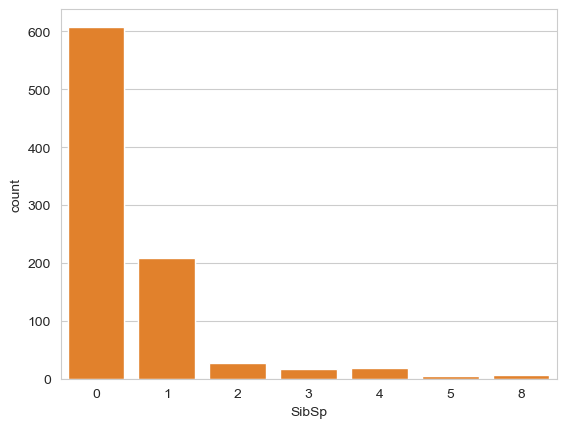

In [56]:
sns.countplot(x='SibSp',data=train)
plt.show()

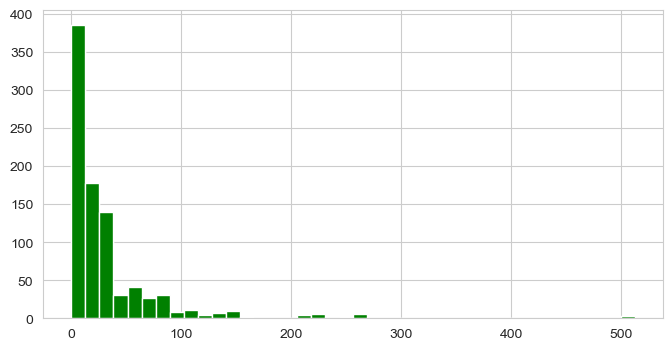

In [58]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))
plt.show()

# **Data Cleaning**

we want to fill in missing age data instead of just dropping the missing age data rows one way to do this is by filling in the mean age of all the passangers (imputation).However we can be smarter about this and check the average age by passenger class for example . 


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15384\2483029661.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


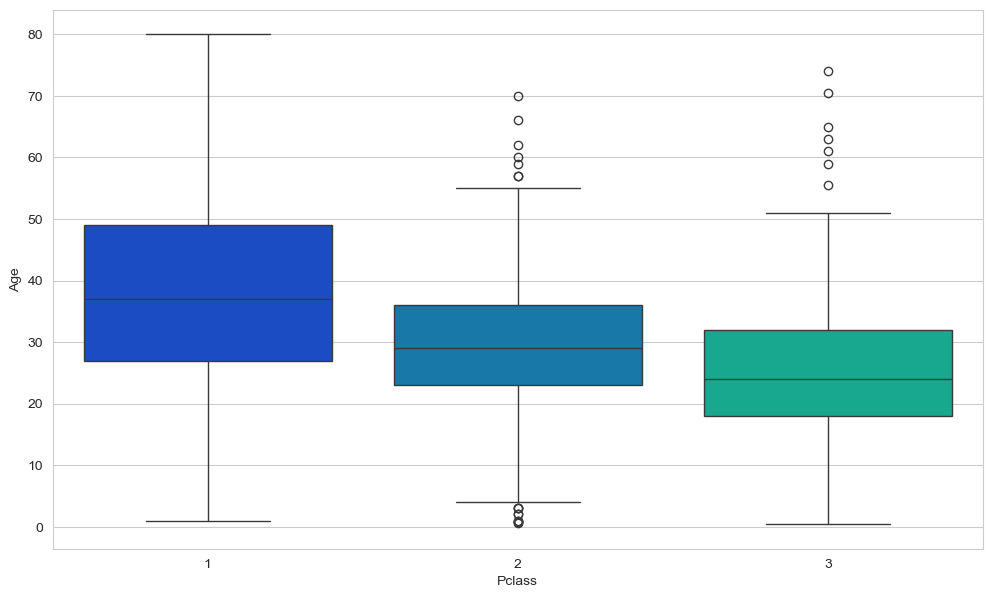

In [62]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
plt.show()

'''for understanding about the percentiles values , which is given by boxplots here watch 
krisnaik sir statistics playlist , there sir taught about this ''' 


we can see the wealthier passengers in the higher classes tend to be older. which makes sense right , we will use these average age values to impute based on pclass for age . 

In [64]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass==1:
            return 37 
        elif Pclass == 2:
            return 29 
        else:
            return 24 
    else:
        return Age

In [68]:
''' in this function we are doing is we are assigning the updated values of age in the age column
we first access the age and pclass column and apply that columns to the impute age function 
and then from there we are then replacing those null values with the average age value right 
and then we are assigning those avg age values to back to the age columns so overall we are just 
overwriting the null values with the avg age values based on their classes . '''
train['Age'] = train[['Age' , 'Pclass']].apply(impute_age , axis=1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15384\2348926659.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15384\2348926659.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


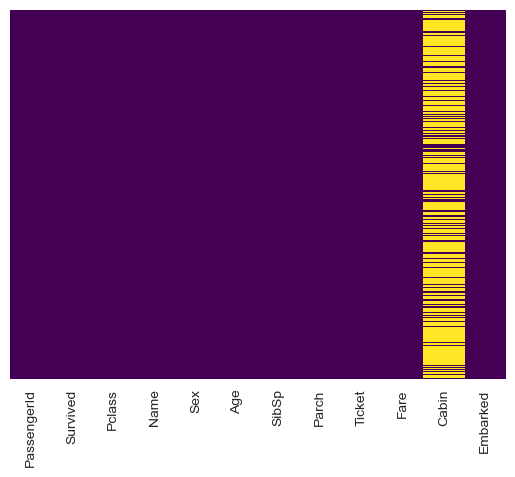

In [69]:
# this function is now showing the values of age function what we did we replace the null values with avg age values so there is no more null values present in the age data as you can see by this heatmap 
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

what are going to do now is drop this cabin col becaues there is a lot of null values and we require feature enigneering concepts to handle and also oftenly whenever we have too much null values in any col we either do feature engineering or drop the column so for now we are just dropping this column at all . 

great lets go ahead and drop the cabin column and the row in embarked that is NaN . 

In [75]:
train.drop('Cabin', axis=1 , inplace=True)

KeyError: "['Cabin'] not found in axis"

In [76]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


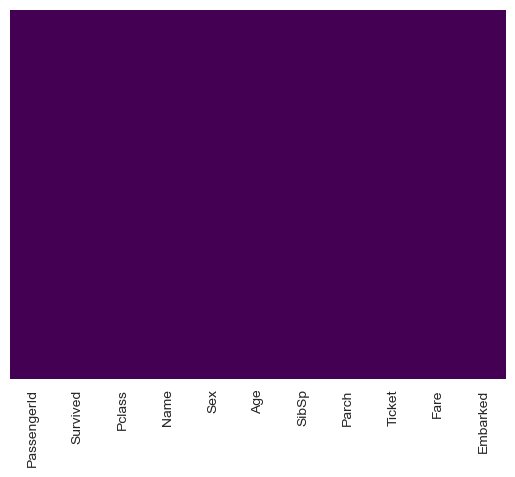

' as we can here all the null values are gone --> why ? --> becuase we just drop the whole cabin\ncolumn so all null values are also gone with that column .'

In [78]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

''' as we can here all the null values are gone --> why ? --> becuase we just drop the whole cabin
column so all null values are also gone with that column .'''

In [79]:
train.dropna(inplace=True)

# **Converting Categorical Features**

we will need to convert categorical features to dummuy variables using pandas otherwise our machine learning algorithm wont be able to directly take in those feature as inputs .

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [83]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [84]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [85]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [86]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [87]:
train = pd.concat([train , sex , embark],axis=1)

In [88]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


now our data is ready to feed to our model  .

# Building a Logistic Regression model

Lets start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

# Train Test Split

In [89]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [90]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train , X_test , y_train , y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)

# Training and Predicting 

In [93]:
from sklearn.linear_model import LogisticRegression

In [95]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None,dual=False,fit_intercept=True,
                  intercept_scaling=1,max_iter=100,multi_class='ovr',n_jobs=1,
                  penalty='12',random_state=None,solver='liblinear',tol=0.0001,
                  verbose=0,warm_start=False)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12',
                   solver='liblinear')

In [96]:
predictions = logmodel.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix 

In [99]:
accuracy = confusion_matrix(y_test,predictions)
accuracy

array([[148,  15],
       [ 39,  65]])

In [100]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,predictions)
accuracy

0.797752808988764

In [101]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

# lets move on to evalute our model ! 

# Evaluation 

we can check the precision , recall , f1-score using classification report ! 

In [104]:
from sklearn.metrics import classification_report

In [105]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.81      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



thats actually a good accuracy , explore other feature enigneering and the other titani_text.csv file , some suggestions for feature engineering:

- try grabbing the title (Dr.,Mr.,Mrs.,etc...) from the name as a feature
- maybe the cabine letter could be a feature
- is there any info you can get from the ticket ? 